In [14]:
'''Problem 5'''
#time.perf_counter()
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt
x = np.random.randint(low = 1, high =100, size = (100,100))
y = np.random.randint(low = 1, high =100, size = (100,100))
z = np.zeros((100, 100))

fstarttime = perf_counter()
for i in range(100):
    for j in range(100):
        z[i][j] = x[i][j] + y[i][j]
ftime = perf_counter()-fstarttime
print("for loop time:", ftime)

ostarttime = perf_counter()
z = x+y
otime = perf_counter() - ostarttime
print("+ operator time:", otime)

for loop time: 0.030316100000163715
+ operator time: 0.0006108000000040192


1000 for average time is: 0.01517107530000112 std is: 0.0026031846924147234
1000 + average time is: 1.315070000077867e-05 std is 2.202663976861211e-05


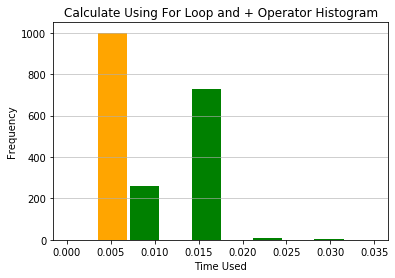

In [12]:
'''Problem 6'''
x = np.random.randint(low=1, high=100, size=(100, 100))
y = np.random.randint(low=1, high=100, size=(100, 100))
z = np.zeros((100, 100))
for_list = []
for ii in range(1000):
    fstarttime = perf_counter()
    for i in range(100):
        for j in range(100):
            z[i][j] = x[i][j] + y[i][j]
    ftime = perf_counter() - fstarttime
    for_list.append(ftime)
print("1000 for average time is:", sum(for_list)/len(for_list), "std is:", np.std(for_list))

o_list=[]
for jj in range(1000):
    ostarttime = perf_counter()
    z = x + y
    otime = perf_counter() - ostarttime
    o_list.append(otime)

print("1000 + average time is:", sum(o_list)/len(o_list), "std is", np.std(o_list))

plt.hist([for_list, o_list], bins=5,  rwidth=0.95, color= ['green', 'orange'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Time Used')
plt.ylabel('Frequency')
plt.title('Calculate Using For Loop and + Operator Histogram')
plt.show()

In [15]:
'''Problem 7'''
import random
import math

'''K means data clustering'''
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

''' Generate the k number of random index to start the k mean clustering'''
def random_points(k,length):
    random_index=[0]*k
    for i in range(k):
        random_index[i]=random.randrange(0,length)
    return random_index

''' Compute the euclidean distance between two points'''
def euclidean_distance(start, end):
    #print(start,end)
    #assert(len(start)==len(end))
    diff_sq=[0]*4
    for i in range(4):
        diff_sq[i]=(start[i]-end[i])**2
    return math.sqrt(sum(diff_sq))

'''Find the center of the vector space and return the center vector'''
def find_center(cluster):
    assert(len(cluster)!=0)
    x=[]
    center=[]
    for i in range(4):
        x=[]
        for instance in cluster:
            assert (len(instance) != 0)
            x.append(instance[i])
        center.append(sum(x)/len(x))
    return center

'''Base on the index, return the vectors'''
def Get_point(index,dataset):
    points=[]
    for i in index:
        points.append(dataset[i])
    return points

def Hamming_distance(dataset):
    counter=0
    for i in range(len(dataset)-1):
        for j  in range(i+1, len(dataset)):
            if (dataset[i][-2]==dataset[j][-2] and dataset[i][-1]!=dataset[j][-1]) or (dataset[i][-2]!=dataset[j][-2] and dataset[i][-1]==dataset[j][-1]):
                counter+=1
    return counter/nCr(len(dataset),2)


def Lloyd_method(dataset,k):
    print("length of the dataset:", len(dataset))
    start_index = random_points(k, len(dataset))
    print("starting index:", start_index)
    start_points = Get_point(start_index, dataset)

    '''Assign the starting point with cluster number'''
    j=0
    for pt in start_points:
        pt.append(j)
        j+=1

    '''Initialize the starting clusters'''
    newclusters=[]
    oldclusters=[]
    for i in range(k):
        newclusters.append([])
        oldclusters.append([])
    #print("length of new clusters", len(newclusters))

    print("start points:", start_points)

    '''Put the start points to the clusters'''
    for item in newclusters:
        item.append(start_points[newclusters.index(item)])

    '''Put the points to the clusters'''
    for vector in dataset:
        distances=[]
        for pt in start_points:
            distances.append(euclidean_distance(vector, pt))
        '''Put the data points into the clusters'''
        newclusters[distances.index(min(distances))].append(vector)
        if vector in start_points:
            vector.pop()
        '''Assign the data points with cluster number'''
        vector.append(distances.index(min(distances)))
        #newclusters[distances.index(min(distances))].append(start_points[distances.index(min(distances))])

    '''If the clusters are not converge'''
    while(oldclusters!=newclusters):
        '''keep the copy of the old cluster, start to create new ones'''
        oldclusters = newclusters.copy()
        '''Calculate the new centers'''
        centers=[]
        for cluster in oldclusters:
            #print("index of the cluster in clusters:", newclusters.index(cluster))
            centers.append(find_center(cluster))

        '''Initialize the new clusters'''
        newclusters=[]
        for i in range(k):
            newclusters.append([])

        '''Assign the new center with the cluster number'''
        j = 0
        for pt in centers:
            pt.append(j)
            j += 1

        '''for item in newclusters:
            item.append(centers[newclusters.index(item)])'''

        ''''Put the data points to the new clusters'''
        for vector in dataset:
            distances=[]
            for pt in centers:
                #print("data:", vector, "center:", pt)
                distances.append(euclidean_distance(vector, pt))
            newclusters[distances.index(min(distances))].append(vector)
            #print("vector before pop:", vector)
            ''''delete the old cluster number'''
            vector.pop()
            #print("vector after pop:", vector)
            '''append new cluster number'''
            vector.append(distances.index(min(distances)))
            #print("vector:", vector)
            #newclusters[distances.index(min(distances))].append(centers[distances.index(min(distances))])


    print("converge happened!!\n\n")




def test():
    ''''format the data'''
    f=open("iris.data")
    sample=f.readlines()
    for i in range(len(sample)):
        sample[i] = sample[i].strip().split(',')

    print(sample)

    data = []
    for item in sample:
        list=[]
        for i in range(len(item)):
            if i!=(len(item)-1):
                list.append(float(item[i]))
            else:
                list.append(item[i])
        data.append(list)

    print(data)
    print(len(data))
    '''Initialize the number of clusters'''
    k=3
    print(random_points(k, len(data)))

    '''clustering the data and calculate the hamming distance'''
    Hdistance=[]
    for i in range(100):
        Lloyd_method(data, k)
        distance=Hamming_distance(data)
        print("\t\t\thamming distance:", distance)
        Hdistance.append(distance)
        for instance in data:
            instance.pop()

    print("\t\t\t\t\t\t\tthe lowest Hamming distance is:", min(Hdistance))









if __name__ == '__main__':
    test()


[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'], ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'], ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'], ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'], ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'], ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'], ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'], ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'], ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'], ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'], ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'], ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'], ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'], ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'], ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'], ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'], ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'], ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'], ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'], ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'], ['5.1', '3.7', '1.5', '0.4', 'Iris-setosa'], ['4.6', '

converge happened!!


			hamming distance: 0.12626398210290826
length of the dataset: 150
starting index: [18, 65, 70]
start points: [[5.7, 3.8, 1.7, 0.3, 'Iris-setosa', 0], [6.7, 3.1, 4.4, 1.4, 'Iris-versicolor', 1], [5.9, 3.2, 4.8, 1.8, 'Iris-versicolor', 2]]
converge happened!!


			hamming distance: 0.12626398210290826
length of the dataset: 150
starting index: [38, 12, 34]
start points: [[4.4, 3.0, 1.3, 0.2, 'Iris-setosa', 0], [4.8, 3.0, 1.4, 0.1, 'Iris-setosa', 1], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa', 2]]
converge happened!!


			hamming distance: 0.2855480984340044
length of the dataset: 150
starting index: [124, 77, 71]
start points: [[6.7, 3.3, 5.7, 2.1, 'Iris-virginica', 0], [6.7, 3.0, 5.0, 1.7, 'Iris-versicolor', 1], [6.1, 2.8, 4.0, 1.3, 'Iris-versicolor', 2]]
converge happened!!


			hamming distance: 0.12026845637583891
length of the dataset: 150
starting index: [58, 54, 137]
start points: [[6.6, 2.9, 4.6, 1.3, 'Iris-versicolor', 0], [6.5, 2.8, 4.6, 1.5, 'Iris-versicolor', 

converge happened!!


			hamming distance: 0.12626398210290826
length of the dataset: 150
starting index: [18, 74, 147]
start points: [[5.7, 3.8, 1.7, 0.3, 'Iris-setosa', 0], [6.4, 2.9, 4.3, 1.3, 'Iris-versicolor', 1], [6.5, 3.0, 5.2, 2.0, 'Iris-virginica', 2]]
converge happened!!


			hamming distance: 0.12626398210290826
length of the dataset: 150
starting index: [29, 35, 8]
start points: [[4.7, 3.2, 1.6, 0.2, 'Iris-setosa', 0], [5.0, 3.2, 1.2, 0.2, 'Iris-setosa', 1], [4.4, 2.9, 1.4, 0.2, 'Iris-setosa', 2]]
converge happened!!


			hamming distance: 0.2831319910514541
length of the dataset: 150
starting index: [89, 127, 135]
start points: [[5.5, 2.5, 4.0, 1.3, 'Iris-versicolor', 0], [6.1, 3.0, 4.9, 1.8, 'Iris-virginica', 1], [7.7, 3.0, 6.1, 2.3, 'Iris-virginica', 2]]
converge happened!!


			hamming distance: 0.12026845637583891
length of the dataset: 150
starting index: [8, 102, 120]
start points: [[4.4, 2.9, 1.4, 0.2, 'Iris-setosa', 0], [7.1, 3.0, 5.9, 2.1, 'Iris-virginica', 1], [6

length of the dataset: 150
starting index: [102, 3, 108]
start points: [[7.1, 3.0, 5.9, 2.1, 'Iris-virginica', 0], [4.6, 3.1, 1.5, 0.2, 'Iris-setosa', 1], [6.7, 2.5, 5.8, 1.8, 'Iris-virginica', 2]]
converge happened!!


			hamming distance: 0.12214765100671139
length of the dataset: 150
starting index: [80, 9, 25]
start points: [[5.5, 2.4, 3.8, 1.1, 'Iris-versicolor', 0], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa', 1], [5.0, 3.0, 1.6, 0.2, 'Iris-setosa', 2]]
converge happened!!


			hamming distance: 0.12814317673378073
length of the dataset: 150
starting index: [41, 85, 38]
start points: [[4.5, 2.3, 1.3, 0.3, 'Iris-setosa', 0], [6.0, 3.4, 4.5, 1.6, 'Iris-versicolor', 1], [4.4, 3.0, 1.3, 0.2, 'Iris-setosa', 2]]
converge happened!!


			hamming distance: 0.12814317673378073
length of the dataset: 150
starting index: [111, 35, 47]
start points: [[6.4, 2.7, 5.3, 1.9, 'Iris-virginica', 0], [5.0, 3.2, 1.2, 0.2, 'Iris-setosa', 1], [4.6, 3.2, 1.4, 0.2, 'Iris-setosa', 2]]
converge happened!!


			hamm